<a href="https://colab.research.google.com/github/thiagolir4/An-lise-Estat-stica-de-Sal-rios-em-Dados/blob/main/An%C3%A1lise_Estat%C3%ADstica_de_Sal%C3%A1rios_em_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 01: Importação e Exploração Inicial da Base

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('salario_profissionais_dados.csv')

In [42]:
df.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [13]:
# Verificar o número de linhas e colunas
print("\n--- Dimensões do DataFrame (df.shape) ---")
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Verificar informações sobre as colunas e tipos de dados
print("\n--- Informações Gerais (df.info()) ---")
df.info()

# Verificar a quantidade de dados ausentes por coluna
print("\n--- Dados Ausentes (df.isnull().sum()) ---")
print(df.isnull().sum())


--- Dimensões do DataFrame (df.shape) ---
O dataset possui 3755 linhas e 10 colunas.

--- Informações Gerais (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB

--- Dados Ausentes (df.isnull().sum()) ---
work_year              0
country                0
region                 0
experien

In [14]:
# Contar quantos valores nulos existem em cada coluna
dados_nulos = df.isnull().sum()

# Exibir apenas as colunas que têm dados nulos (se houver alguma)
print("Contagem de dados nulos por coluna:")
print(dados_nulos[dados_nulos > 0])

Contagem de dados nulos por coluna:
Series([], dtype: int64)


In [15]:
# O parâmetro keep='first' (padrão) não mostra a primeira ocorrência da linha.
# Usar keep=False mostra TODAS as ocorrências de qualquer linha duplicada.
linhas_duplicadas = df[df.duplicated(keep=False)]

if not linhas_duplicadas.empty:
    print("\n--- Visualizando as linhas duplicadas ---")
    # Ordenar para ver as linhas duplicadas juntas
    print(linhas_duplicadas.sort_values(by=list(df.columns)))
else:
    print("\nNão foram encontradas linhas duplicadas.")


--- Visualizando as linhas duplicadas ---
      work_year                   country    region experience_level  \
3464       2021  United States of America  Americas               SE   
3575       2021  United States of America  Americas               SE   
2888       2022                    Greece    Europe               MI   
3204       2022                    Greece    Europe               MI   
2677       2022                     Spain    Europe               SE   
...         ...                       ...       ...              ...   
1560       2023  United States of America  Americas               SE   
1706       2023  United States of America  Americas               SE   
525        2023  United States of America  Americas               SE   
956        2023  United States of America  Americas               SE   
1751       2023  United States of America  Americas               SE   

               job_title  salary_in_usd employee_residence company_location  \
3464       Da

In [16]:
# Verificar o formato do DataFrame ANTES de remover
print(f"Formato original: {df.shape}")

# Remover as duplicatas. É boa prática criar um novo DataFrame.
df_sem_duplicatas = df.drop_duplicates()

# Verificar o formato DEPOIS de remover
print(f"Formato após remoção: {df_sem_duplicatas.shape}")

# Você pode fazer uma verificação final para garantir que não há mais duplicatas
duplicatas_restantes = df_sem_duplicatas.duplicated().sum()
print(f"Duplicatas restantes: {duplicatas_restantes}")

Formato original: (3755, 10)
Formato após remoção: (2969, 10)
Duplicatas restantes: 0


## Etapa 02: Frequência e Distribuição das Categorias

In [26]:
# 10 Cargos mais comuns na base
print("--- 10 Cargos Mais Comuns (value_counts()) ---")
print(df_sem_duplicatas['job_title'].value_counts().head(10))

# Distribuição do nível de experiência em porcentagem
print("\n--- Distribuição do Nível de Experiência (%) ---")
print(df_sem_duplicatas['experience_level'].value_counts(normalize=True) * 100)

# Distribuição do tamanho da empresa em porcentagem
print("\n--- Distribuição do Tamanho da Empresa (%) ---")
print(df_sem_duplicatas['company_size'].value_counts(normalize=True) * 100)

# Análise Cruzada: Nível de Experiência vs. Tamanho da Empresa
print("--- Análise Cruzada: Nível de Experiência vs. Tamanho da Empresa ---")
print(pd.crosstab(df_sem_duplicatas['experience_level'], df_sem_duplicatas['company_size']))
print("\n" + "="*60 + "\n")

--- 10 Cargos Mais Comuns (value_counts()) ---
job_title
Data Engineer                724
Data Scientist               624
Data Analyst                 464
Machine Learning Engineer    245
Analytics Engineer            97
Data Architect                84
Research Scientist            71
Data Science Manager          55
Applied Scientist             44
Research Engineer             37
Name: count, dtype: int64

--- Distribuição do Nível de Experiência (%) ---
experience_level
SE    62.647356
MI    24.250589
EN     9.666554
EX     3.435500
Name: proportion, dtype: float64

--- Distribuição do Tamanho da Empresa (%) ---
company_size
M    80.330077
L    14.685079
S     4.984843
Name: proportion, dtype: float64
--- (NOVO) Análise Cruzada: Nível de Experiência vs. Tamanho da Empresa ---
company_size        L     M   S
experience_level               
EN                 98   140  49
EX                 13    83   6
MI                134   536  50
SE                191  1626  43




## Etapa 03: Estatísticas Descritivas

In [28]:
# Gera as principais estatísticas descritivas para a coluna de salários
resumo_salarial = df_sem_duplicatas['salary_in_usd'].describe()

print("--- Resumo Estatístico dos Salários (em USD) ---")
print(resumo_salarial.round(2))

--- Resumo Estatístico dos Salários (em USD) ---
count      2969.00
mean     135301.23
std       65994.42
min        5132.00
25%       89200.00
50%      130000.00
75%      175950.00
max      450000.00
Name: salary_in_usd, dtype: float64


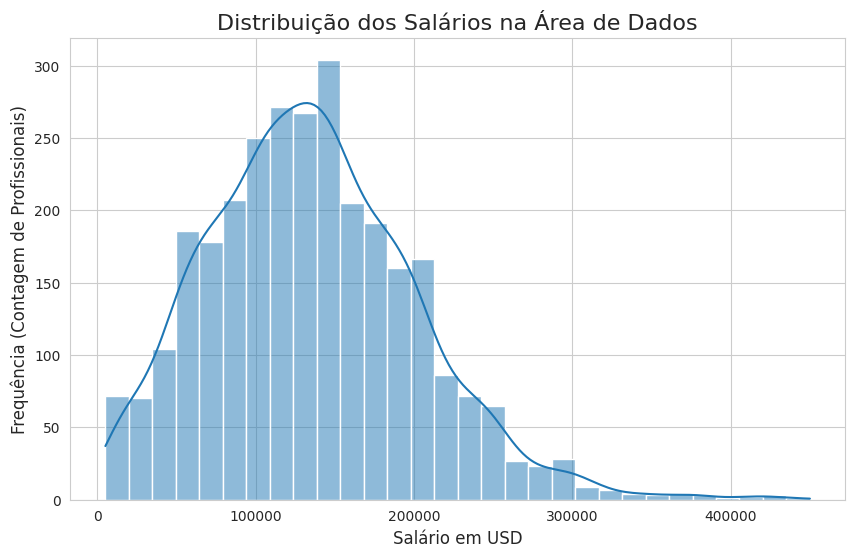

In [31]:
# Configura o estilo dos gráficos
sns.set_style("whitegrid")

# Cria o histograma
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.histplot(data=df_sem_duplicatas, x='salary_in_usd', kde=True, bins=30)
# kde=True adiciona uma linha de densidade suave para melhor visualização
# bins=30 define em quantas "barras" os dados serão divididos

plt.title('Distribuição dos Salários na Área de Dados', fontsize=16)
plt.xlabel('Salário em USD', fontsize=12)
plt.ylabel('Frequência (Contagem de Profissionais)', fontsize=12)

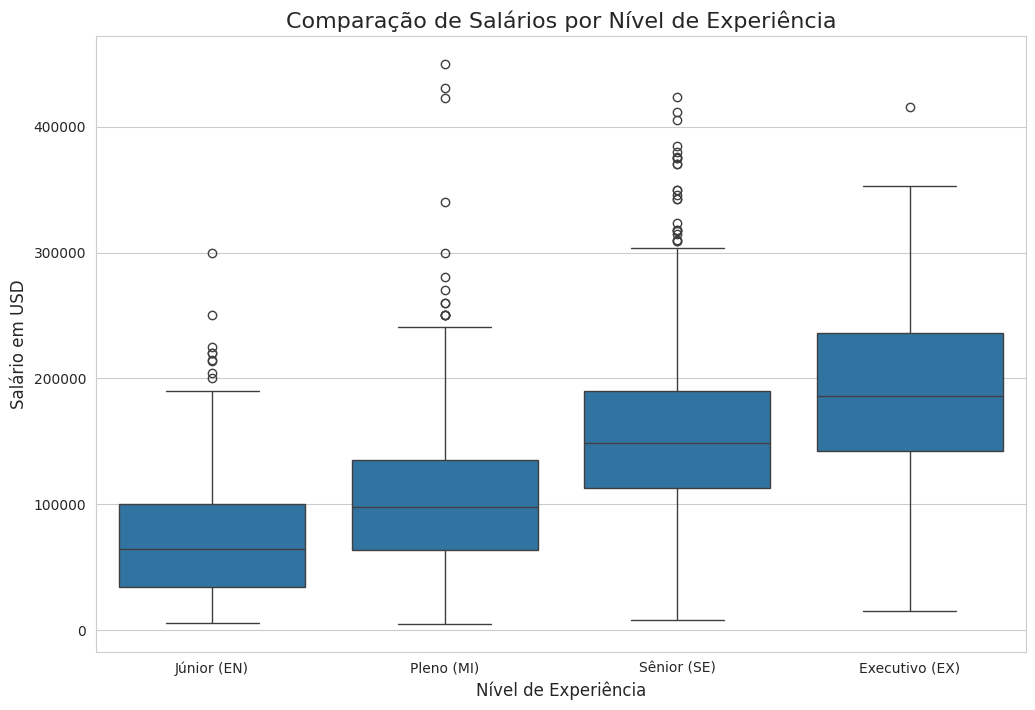

In [33]:
ordem_experiencia = ['EN', 'MI', 'SE', 'EX']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_sem_duplicatas, x='experience_level', y='salary_in_usd', order=ordem_experiencia)

plt.title('Comparação de Salários por Nível de Experiência', fontsize=16)
plt.xlabel('Nível de Experiência', fontsize=12)
plt.ylabel('Salário em USD', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Júnior (EN)', 'Pleno (MI)', 'Sênior (SE)', 'Executivo (EX)'])

## Etapa 4: Comparações por País

In [35]:
# Agrupa por país, calcula a média salarial, ordena e seleciona os 10 maiores
top_10_paises = df_sem_duplicatas.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

print("--- Top 10 Países por Média Salarial (em USD) ---")
print(top_10_paises.round(2))

--- Top 10 Países por Média Salarial (em USD) ---
company_location
IL    271446.50
PR    167500.00
US    152637.79
RU    140333.33
CA    130451.62
NZ    125000.00
BA    120000.00
IE    114943.43
JP    114127.33
SE    105000.00
Name: salary_in_usd, dtype: float64


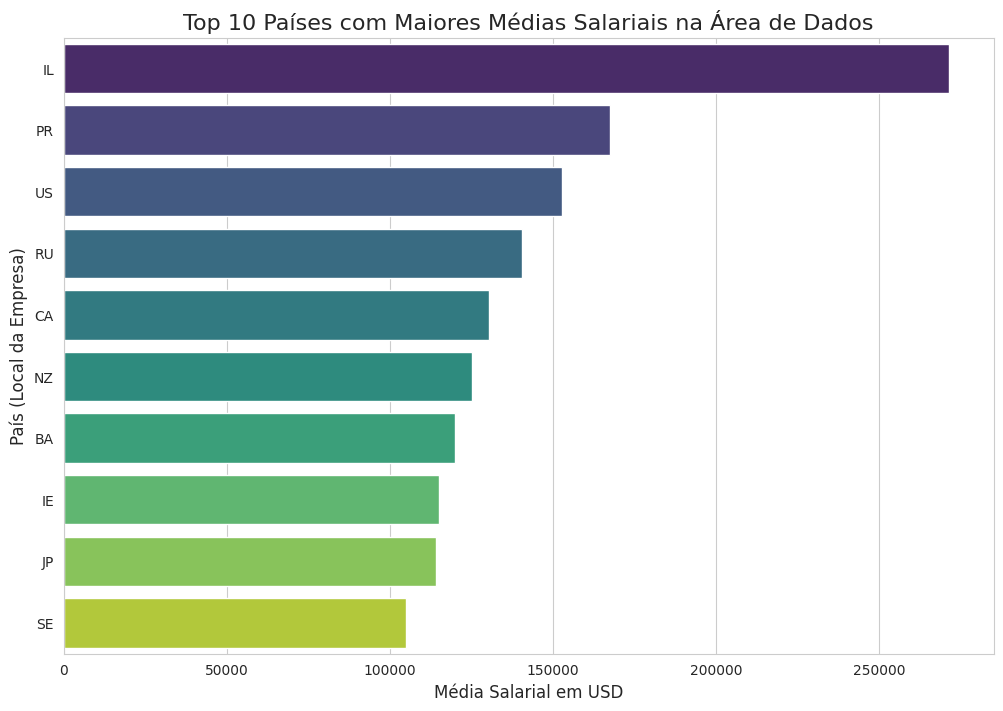

In [36]:
# Configurações do gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_paises.values, y=top_10_paises.index, palette='viridis')
# Usamos .values para os valores (eixo x) e .index para os nomes dos países (eixo y)

plt.title('Top 10 Países com Maiores Médias Salariais na Área de Dados', fontsize=16)
plt.xlabel('Média Salarial em USD', fontsize=12)
plt.ylabel('País (Local da Empresa)', fontsize=12)
plt.show()

## Etapa 5: Correlações e Tendências

In [38]:
# Lista das colunas numéricas que vamos analisar
# Agora incluindo 'years_of_experience' e removendo 'remote_ratio'
numeric_cols = ['work_year', 'salary_in_usd', 'years_of_experience']

# Calcula a matriz de correlação
correlation_matrix = df_sem_duplicatas[numeric_cols].corr()

print("--- Matriz de Correlação ---")
print(correlation_matrix.round(2))

--- Matriz de Correlação ---
                     work_year  salary_in_usd  years_of_experience
work_year                 1.00           0.24                 0.20
salary_in_usd             0.24           1.00                 0.43
years_of_experience       0.20           0.43                 1.00


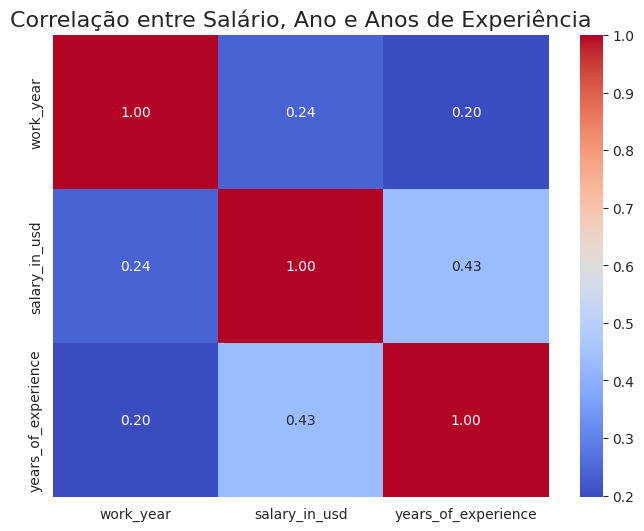

In [39]:
# Cria o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# annot=True exibe os números
# cmap='coolwarm' para a paleta de cores (vermelho=positivo, azul=negativo)

plt.title('Correlação entre Salário, Ano e Anos de Experiência', fontsize=16)
plt.show()

Como ler a matriz:
A matriz mostra o coeficiente de correlação (um valor entre -1 e 1) entre cada par de variáveis:

Próximo de 1: Forte correlação positiva (quando uma variável sobe, a outra também tende a subir).

Próximo de -1: Forte correlação negativa (quando uma variável sobe, a outra tende a descer).

Próximo de 0: Correlação linear fraca ou inexistente.

Interpretação Final e Respostas às Perguntas:

# **1. Existe alguma tendência de aumento salarial com os anos?**

Sim, há uma leve tendência de aumento (Coeficiente fraco de 0.24). Um valor como esse indica que os salários no mercado de dados, de forma geral, subiram modestamente ao longo dos anos registrados no dataset.

# **2. Quanto maior o tempo de experiência, maior o salário?**

Sim, definitivamente. Um coeficiente médio de 0.43 aqui é a prova quantitativa de que os anos de experiência são um dos fatores mais determinantes para o aumento salarial. Quanto mais anos de experiência um profissional tem, maior tende a ser o seu salário.

Insight Adicional: Qual fator é mais forte?
Ao comparar os dois coeficientes, você  notará que a correlação de salary_in_usd com years_of_experience é muito mais forte do que com work_year.

Isso gera um insight valioso: para um profissional de dados, a sua experiência individual (years_of_experience) tem um impacto muito maior no seu potencial de ganho do que a valorização geral do mercado ao longo do tempo (work_year).